In [2]:
import numpy as np
import trompy as tp
import pandas as pd
import dabest as db

import matplotlib.transforms as transforms

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def halfviolin(v, half='right', fill_color='k', alpha=1,
                line_color='k', line_width=0):
    import numpy as np

    for b in v['bodies']:
        V = b.get_paths()[0].vertices

        mean_vertical = np.mean(V[:, 0])
        mean_horizontal = np.mean(V[:, 1])

        if half == 'right':
            V[:, 0] = np.clip(V[:, 0], mean_vertical, np.inf)
        elif half == 'left':
            V[:, 0] = np.clip(V[:, 0], -np.inf, mean_vertical)
        elif half == 'bottom':
            V[:, 1] = np.clip(V[:, 1], -np.inf, mean_horizontal)
        elif half == 'top':
            V[:, 1] = np.clip(V[:, 1], mean_horizontal, np.inf)

        b.set_color(fill_color)
        b.set_alpha(alpha)
        b.set_edgecolor(line_color)
        b.set_linewidth(line_width)
        
def equalize_y(ax):
    lim = np.max(np.abs(ax.get_ylim()))
    ax.set_ylim([-lim, lim])

In [4]:
data_2x1 = np.random.randn(2,8)
data_2x2 = np.random.randn(2,2,8)
data_4x2 = np.random.randn(2,4,8)

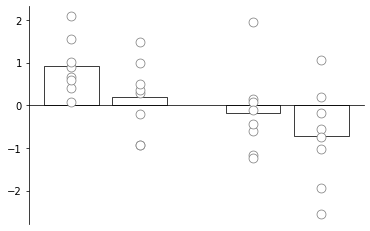

In [5]:
tp.barscatter(data_2x2);


In [6]:
data_2x2

array([[[ 0.39573232,  0.07499059,  0.67188143,  0.90704508,
          2.08546111,  1.02472939,  0.59126437,  1.54646602],
        [ 0.28067738, -0.19672308,  0.34782363,  0.49725814,
          0.99361678,  1.48423598, -0.94014324, -0.9432161 ]],

       [[-0.5933819 ,  0.14544802,  0.07303935, -1.158316  ,
         -0.11552871, -0.43225925, -1.23976976,  1.95093396],
        [-0.17776992, -2.54646777, -1.9427879 , -0.561437  ,
          1.05775027, -1.02550114, -0.74926572,  0.18988255]]])

In [7]:
data_list_2x1 =[]
for i in range(2):
    data_list_2x1.append(np.random.rand(8))
    
data_list_3x1 =[]
for i in range(3):
    data_list_3x1.append(np.random.rand(8))
    
data_list_2x2 =[]
for i in range(2):
    data_list_2x2.append([])
    for j in range(2):
        data_list_2x2[i].append(np.random.rand(8))

In [8]:
np.shape(data_list_2x2)

(2, 2, 8)

In [9]:
def convert_data_to_df(data, paired=False):
    
    ndims = len(np.shape(data)) - 1
    print(ndims)
    if ndims < 1:
        print("Provided data appear to have only one dimension so cannot make a estimation figure.")
        return
    elif ndims > 2:
        print("Provided data appear to more than two dimensions so (currently) cannot make a estimation figure.")
        return

    data = np.array(data)
    index = np.arange(np.shape(data)[-1])
    
    dim1, dim2 = np.shape(data)[0], np.shape(data)[1]

    if ndims == 1:  
        data_cols = ["control1"]   
        for c in range(1, np.shape(data)[0]):
            data_cols.append("test{}".format(c))
        
        data = data.T
        df = pd.DataFrame(data, columns = data_cols)
        df.insert(0, "id", index)
        
    elif ndims == 2:
        
        data_cols = []
        for c in range(1, np.shape(data)[0]+1):
            data_cols.append("control{}".format(c))

        for c in range(1, np.shape(data)[1]+1):
            data_cols.append("test{}".format(c))
            
        print(data_cols)
        data = np.reshape(data, [len(index), dim1, dim2])
        print(np.shape(data))
        df = pd.DataFrame(data, columns = data_cols)
        
        
    print(np.shape(data))
    return df, data_cols

    

df, data_cols = convert_data_to_df(data_list_2x2)
# f, ax = plt.subplots()
# results = estimation_plot(df, idx=data_cols, ax=ax)

2
['control1', 'control2', 'test1', 'test2']
(8, 2, 2)


ValueError: Must pass 2-d input. shape=(8, 2, 2)

In [158]:


data_for_df1 = np.array([[str(a) for a in np.arange(1,9)], np.random.randn(8), np.random.randn(8)]).T
df1 = pd.DataFrame(data_for_df, columns=["id", "control1", "test1"])


data_for_df2 = np.array([[str(a) for a in np.arange(9,17)], np.random.randn(8), np.random.randn(8)]).T
df2 = pd.DataFrame(data_for_df, columns=["id", "control2", "test2"])

df = pd.concat([df1, df2], sort=True)

In [162]:
estimation_plot(df, idx=(("control1", "test1"), ("control2", "test2")), ax=ax, paired=False)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [113]:
results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,control1,test1,8,8,mean difference,False,0.115426,95,-0.215209,0.424278,...,5000,12345,0.5248,5000,0.524353,-0.653175,0.524226,-0.653175,0.573737,26.0
1,control1,test2,8,8,mean difference,False,0.210040,95,-0.071647,0.473361,...,5000,12345,0.1714,5000,0.180820,-1.437856,0.172451,-1.437856,0.278632,21.0


In [126]:
def estimation_plot(df, barx=[], ax=[], stats_args={}, idx=("control1", "test1"), orientation="vert",
                    plottype="onegroup", paired=False):
    """
    This function uses modified source code from the dabest Python package, 
    Copyright (c) 2016-2020 Joses W. Ho
    All rights reserved.
    https://github.com/ACCLAB/DABEST-python
    """
    
    if paired == True:
        est_stats = db.load(df, idx=idx, id_col="id", paired=True)
    else:
        est_stats = db.load(df, idx=idx, id_col="id", paired=False)
        
    e = est_stats.mean_diff
    results = e.results
    
#     try:
#         with pd.ExcelWriter(stats_args["file"], mode="a", engine="openpyxl") as writer:
#             results.to_excel(writer, sheet_name=stats_args["sheet"])
#     except:
#         print("No stats file to write to.")

    contrast_xtick_labels = []
    
    dabest_obj  = e.dabest_obj
    plot_data   = e._plot_data
    xvar        = e.xvar
    yvar        = e.yvar
    is_paired   = e.is_paired

    all_plot_groups = dabest_obj._all_plot_groups
    idx             = dabest_obj.idx
    
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                               'showextrema':False, 'showmedians':False}
        
    violinplot_kwargs = default_violinplot_kwargs
    
    ticks_to_skip   = np.cumsum([len(t) for t in idx])[:-1].tolist()
    ticks_to_skip.insert(0, 0)
    
    # Then obtain the ticks where we have to plot the effect sizes.
    ticks_to_plot = [t for t in range(0, len(all_plot_groups))
                    if t not in ticks_to_skip]
    if len(barx) == 0:
        barx = np.arange(len(all_plot_groups))
        
    ticks_to_plot = [barx[tick] for tick in ticks_to_plot]
    
    fcolors = ["grey", "red"]
    
    for j, tick in enumerate(ticks_to_plot):
        current_group     = results.test[j]
        current_control   = results.control[j]
        current_bootstrap = results.bootstraps[j]
        current_effsize   = results.difference[j]
        current_ci_low    = results.bca_low[j]
        current_ci_high   = results.bca_high[j]

        v = ax.violinplot(current_bootstrap[~np.isinf(current_bootstrap)],
                                      positions=[tick],
                                      **violinplot_kwargs)

        halfviolin_alpha=0.7
        halfviolin(v, fill_color="grey", alpha=halfviolin_alpha)
    
        ytick_color="black"
        es_marker_size=4

    #     # Plot the effect size.
        ax.plot([tick], current_effsize, marker='o',
                            color=ytick_color,
                            markersize=es_marker_size)
        # Plot the confidence interval.
        ax.plot([tick, tick],
                            [current_ci_low, current_ci_high],
                            linestyle="-",
                            color=ytick_color,
                            # linewidth=group_summary_kwargs['lw'],
                            linewidth=1)
        
    trans = transforms.blended_transform_factory(
                        ax.transData, ax.transAxes)
    ax.spines["bottom"].set_visible(False)
    

    ax.axhline(color="black")

    ax.set_ylabel("Paired difference")

        
    
#     if plottype == "twogroup":
#         ax.axhline(color="black")
#         ax.plot([barx[0], barx[1]], [-0.05, -0.05], transform=trans, color="black", clip_on=False)
#         ax.plot([barx[2], barx[3]], [-0.05, -0.05], transform=trans, color="black", clip_on=False)
        
#         for xtick in barx:
#             ax.plot([xtick, xtick], [-0.1, -0.05], transform=trans, color="black", clip_on=False)
            
#         for xtick in ticks_to_plot:
#             ax.text(xtick, -0.12, "C-M", ha="center", va="top", transform=trans, color="black", clip_on=False, fontsize=6)
    
#         ax.set_ylabel("Paired difference", fontsize=6)
    
#     elif plottype == "onegroup":

        
#     elif plottype == "horiz":
#         ax.axhline(color="grey", linestyle="dashed")
        
#     elif plottype == "summary":
#         ax.axhline(color="black")
        
#         for xtick in ticks_to_plot:
#             ax.text(xtick, -0.04, "vs.\nd1", ha="center", va="top", transform=trans, color="black", clip_on=False, fontsize=6)

#         ax.set_ylabel("Diff. vs. Pref. 1", fontsize=6)
        
#     else:
#         print("Not a valid option for plottype.")
        
    return results

In [28]:
def prep4estimationstats_1group(df, groups, keys, id_col="rat"):
    
    df1 = df.xs(groups[0], level=1)[keys]
    df1.reset_index(inplace=True)
    df1.columns = [id_col, "control1", "test1"]
    
    df_to_return = df1
    
    data_to_return = [df1["control1"].tolist(), df1["test1"].tolist()]
    
    return data_to_return, df_to_return

In [ ]:
def prep4estimationstats(df, groups, keys, id_col="rat"):
    
    df1 = df.xs(groups[0], level=1)[keys]
    df1.reset_index(inplace=True)
    df1.columns = [id_col, "control1", "test1"]
    
    df2 = df.xs(groups[1], level=1)[keys]
    df2.reset_index(inplace=True)
    df2.columns = [id_col, "control2", "test2"]
    
    df_to_return = pd.concat([df1, df2], sort=True)
    
    data_to_return = np.array([[df1["control1"], df1["test1"]], [df2["control2"], df2["test2"]]], dtype=object)

    return data_to_return, df_to_return

In [32]:
def barscatter_plus_estimation(data, df, ylabel="", stats_args={}):
    
    data = np.array(data, dtype=object)
    
    f, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(1.3, 1.75),
                         gridspec_kw={"height_ratios": [1, 0.5], "left": 0.35, "right": 0.95, "bottom": 0.1})
    
    grouplabel=['NR', 'PR']
    barfacecolor = [col['nr_malt'], col['nr_cas'], col['pr_malt'], col['pr_cas']]
    
    _, barx, _, _ = tp.barscatter(data, ax=ax1, paired=True,
                                  barfacecoloroption = 'individual',
                                  barfacecolor = barfacecolor,
                                  scatteredgecolor = ['xkcd:charcoal'],
                                  scatterlinecolor = 'xkcd:charcoal',
                                  # grouplabel=grouplabel,
                                  # barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                                  scattersize = scattersize)
    
    ax1.set_ylabel(ylabel, fontsize=6)
    
    estimation_plot(df, barx=barx, ax=ax2, stats_args=stats_args, idx=(("control1", "test1"), ("control2", "test2")), plottype="twogroup")
    
    equalize_y(ax2)
    
    trans = transforms.blended_transform_factory(
                    ax1.transData, ax1.transAxes)
    barlabels = ['Malt', 'Cas', 'Malt', 'Cas']
    
    for xtick, label in zip(barx, barlabels):
        ax1.text(xtick, -0.03, label, ha="center", va="top", transform=trans, fontsize=5)
        
    f.align_ylabels()
    
    return f

In [8]:

    
    
        
def prep4estimationstats(df, groups, keys, id_col="rat"):
    
    df1 = df.xs(groups[0], level=1)[keys]
    df1.reset_index(inplace=True)
    df1.columns = [id_col, "control1", "test1"]
    
    df2 = df.xs(groups[1], level=1)[keys]
    df2.reset_index(inplace=True)
    df2.columns = [id_col, "control2", "test2"]
    
    df_to_return = pd.concat([df1, df2], sort=True)
    
    data_to_return = np.array([[df1["control1"], df1["test1"]], [df2["control2"], df2["test2"]]], dtype=object)

    return data_to_return, df_to_return

def prep4estimationstats_1group(df, groups, keys, id_col="rat"):
    
    df1 = df.xs(groups[0], level=1)[keys]
    df1.reset_index(inplace=True)
    df1.columns = [id_col, "control1", "test1"]
    
    df_to_return = df1
    
    data_to_return = [df1["control1"].tolist(), df1["test1"].tolist()]
    
    return data_to_return, df_to_return

def prep4estimationstats_summary(df, groups, keys, id_col="rat"):
    
    df1 = df.xs(groups[0], level=1)[keys]
    df1.reset_index(inplace=True)
    df1.columns = [id_col, "control1", "test1", "test2"]
    
    df_to_return = df1
    
    data_to_return = [df1["control1"].tolist(), df1["test1"].tolist(), df1["test2"].tolist()]
        
    return data_to_return, df_to_return
        
def barscatter_plus_estimation(data, df, ylabel="", stats_args={}):
    
    data = np.array(data, dtype=object)
    
    f, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(1.3, 1.75),
                         gridspec_kw={"height_ratios": [1, 0.5], "left": 0.35, "right": 0.95, "bottom": 0.1})
    
    grouplabel=['NR', 'PR']
    barfacecolor = [col['nr_malt'], col['nr_cas'], col['pr_malt'], col['pr_cas']]
    
    _, barx, _, _ = tp.barscatter(data, ax=ax1, paired=True,
                                  barfacecoloroption = 'individual',
                                  barfacecolor = barfacecolor,
                                  scatteredgecolor = ['xkcd:charcoal'],
                                  scatterlinecolor = 'xkcd:charcoal',
                                  # grouplabel=grouplabel,
                                  # barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                                  scattersize = scattersize)
    
    ax1.set_ylabel(ylabel, fontsize=6)
    
    estimation_plot(df, barx=barx, ax=ax2, stats_args=stats_args, idx=(("control1", "test1"), ("control2", "test2")), plottype="twogroup")
    
    equalize_y(ax2)
    
    trans = transforms.blended_transform_factory(
                    ax1.transData, ax1.transAxes)
    barlabels = ['Malt', 'Cas', 'Malt', 'Cas']
    
    for xtick, label in zip(barx, barlabels):
        ax1.text(xtick, -0.03, label, ha="center", va="top", transform=trans, fontsize=5)
        
    f.align_ylabels()
    
    return f

def barscatter_plus_estimation_1group(data, df, colors="control", ylabel="", stats_args={}):
        
    f, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(1, 1.75),
                         gridspec_kw={"height_ratios": [1, 0.5], "left": 0.43, "right": 0.95, "bottom": 0.1})
    
    # grouplabel=['NR', 'PR']
    if colors == "expt":
        barfacecolor = [col['pr_malt'], col['pr_cas']]
    else:
        barfacecolor = [col['nr_malt'], col['nr_cas']]
        
        
    _, barx, _, _ = tp.barscatter(data, ax=ax1, paired=True,
                                  barfacecoloroption = 'individual',
                                  barfacecolor = barfacecolor,
                                  scatteredgecolor = ['xkcd:charcoal'],
                                  scatterlinecolor = 'xkcd:charcoal',
                                  barwidth = .75,
                                  groupwidth = .5,
                                  # grouplabel=grouplabel,
                                  # barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                                  scattersize = scattersize)
    
    ax1.set_ylabel(ylabel, fontsize=6)
    
    estimation_plot(df, barx=barx, ax=ax2, stats_args=stats_args, idx=("control1", "test1"), plottype="onegroup")
    equalize_y(ax2)
    
    ax1.set_xlim([0.2,2.8])
    
    trans = transforms.blended_transform_factory(
                    ax1.transData, ax1.transAxes)
    barlabels = ['Malt', 'Cas']
    
    for xtick, label in zip(barx, barlabels):
        ax1.text(xtick, -0.03, label, ha="center", va="top", transform=trans, fontsize=6)
        
    f.align_ylabels()
    
    return f

def barscatter_plus_estimation_summary(data, df, colors="control", ylabel="", stats_args={}):

    f, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(1.3, 1.75),
                         gridspec_kw={"height_ratios": [1, 0.5], "left": 0.35, "right": 0.95, "bottom": 0.1})
    
    if colors == "control":
        barfacecolor = [col['nr_cas'], col['pr_cas'], col['pr_cas']]
    else:
        barfacecolor = [col['pr_cas'], col['nr_cas'], col['nr_cas']]
    
    _, barx, _, _ = tp.barscatter(data, ax=ax1, paired=True,
                                  barfacecoloroption = 'individual',
                                  barfacecolor = barfacecolor,
                                  scatteredgecolor = ['xkcd:charcoal'],
                                  scatterlinecolor = 'xkcd:charcoal',
                                  # grouplabel=grouplabel,
                                  # barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                                  scattersize = scattersize)
    
    ax1.set_ylabel(ylabel, fontsize=6)
    ax1.set_yticks([0, 0.5, 1.0])
    ax1.set_xlim([0.2, 3.8])
    
    estimation_plot(df, barx=barx, ax=ax2, stats_args=stats_args, idx=("control1", "test1", "test2"), plottype="summary")
    
    equalize_y(ax2)
    
    trans = transforms.blended_transform_factory(
                    ax1.transData, ax1.transAxes)
    barlabels = ["1", "2", "3"]
    
    for xtick, label in zip(barx, barlabels):
        ax1.text(xtick, -0.04, label, ha="center", va="top", transform=trans, fontsize=6)
    
    f.align_ylabels()
    
    return f

def barscatter_plus_estimation_vs50_2col(data, df, ylabel="", stats_args={}):
    
    data[:,0] = data[:,1]
    data[:,1] = [[], []]
    
    data = np.array(data, dtype=object)
    
    grouplabel=['NR', 'PR']
    barfacecolor = [col['nr_cas'], col['nr_cas'], col['pr_cas'], col['pr_cas']]
    
    f, ax1 = plt.subplots(figsize=(1.9, 1.75),
                         gridspec_kw={"left": 0.35, "right": 0.85, "bottom": 0.1})

    
    _, barx, _, _ = tp.barscatter(data, ax=ax1, paired=False,
                                  barfacecoloroption = 'individual',
                                  barfacecolor = barfacecolor,
                                  scatteredgecolor = ['xkcd:charcoal'],
                                  scatterlinecolor = 'xkcd:charcoal',
                                  # grouplabel=grouplabel,
                                  # barlabels=['Cas', 'Malt', 'Cas', 'Malt'],
                                  scattersize = 10,
                                  spaced=True,
                                  xspace=0.1,)

    ax1.set_ylabel(ylabel, fontsize=6)
    
    ax2 = ax1.twinx() 
    
    estimation_plot(df, barx=barx, ax=ax2, stats_args=stats_args, idx=(("control1", "test1"), ("control2", "test2")), plottype="horiz")
    
    ax1.set_ylim([-0.03, 1.1])
    ax2.set_ylim([-0.53, 0.6])
    
    ax1.set_yticks([0, 0.5, 1])
    # ax2.set_yticks([-0.5, 0, 0.5])
    ax2.set_yticks([])

    
    trans = transforms.blended_transform_factory(
                    ax1.transData, ax1.transAxes)
    
    xticks = [1, 2]
        
    for xtick, label in zip(xticks, grouplabel):
        ax1.text(xtick, -0.03, label, ha="center", va="top", transform=trans, fontsize=6)
        
    # ax1.set_xlim([0,4])

    return f

def estimation_plot(df, barx=[], ax=[], stats_args={}, idx=("control1", "test1"), plottype="onegroup"):
    """
    This function uses modified source code from the dabest Python package, 
    Copyright (c) 2016-2020 Joses W. Ho
    All rights reserved.
    https://github.com/ACCLAB/DABEST-python
    """
    
    if plottype == "summary":
        est_stats = db.load(df, idx=idx, id_col="rat", paired=False)
    else:
        est_stats = db.load(df, idx=idx, id_col="rat", paired=True)
        
    e = est_stats.mean_diff
    results = e.results
    
    try:
        with pd.ExcelWriter(stats_args["file"], mode="a", engine="openpyxl") as writer:
            results.to_excel(writer, sheet_name=stats_args["sheet"])
    except:
        print("No stats file to write to.")

    contrast_xtick_labels = []
    
    dabest_obj  = e.dabest_obj
    plot_data   = e._plot_data
    xvar        = e.xvar
    yvar        = e.yvar
    is_paired   = e.is_paired

    all_plot_groups = dabest_obj._all_plot_groups
    idx             = dabest_obj.idx
    
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                               'showextrema':False, 'showmedians':False}
        
    violinplot_kwargs = default_violinplot_kwargs
    
    ticks_to_skip   = np.cumsum([len(t) for t in idx])[:-1].tolist()
    ticks_to_skip.insert(0, 0)
    
    # Then obtain the ticks where we have to plot the effect sizes.
    ticks_to_plot = [t for t in range(0, len(all_plot_groups))
                    if t not in ticks_to_skip]

    ticks_to_plot = [barx[tick] for tick in ticks_to_plot]
    
    fcolors = [col['nr_cas'], col['pr_cas']]
    
    for j, tick in enumerate(ticks_to_plot):
        current_group     = results.test[j]
        current_control   = results.control[j]
        current_bootstrap = results.bootstraps[j]
        current_effsize   = results.difference[j]
        current_ci_low    = results.bca_low[j]
        current_ci_high   = results.bca_high[j]

        v = ax.violinplot(current_bootstrap[~np.isinf(current_bootstrap)],
                                      positions=[tick],
                                      **violinplot_kwargs)

        halfviolin_alpha=0.7
        halfviolin(v, fill_color=fcolors[j], alpha=halfviolin_alpha)
    
        ytick_color="black"
        es_marker_size=4

    #     # Plot the effect size.
        ax.plot([tick], current_effsize, marker='o',
                            color=ytick_color,
                            markersize=es_marker_size)
        # Plot the confidence interval.
        ax.plot([tick, tick],
                            [current_ci_low, current_ci_high],
                            linestyle="-",
                            color=ytick_color,
                            # linewidth=group_summary_kwargs['lw'],
                            linewidth=1)
        
    trans = transforms.blended_transform_factory(
                        ax.transData, ax.transAxes)
    ax.spines["bottom"].set_visible(False)
    
    if plottype == "twogroup":
        ax.axhline(color="black")
        ax.plot([barx[0], barx[1]], [-0.05, -0.05], transform=trans, color="black", clip_on=False)
        ax.plot([barx[2], barx[3]], [-0.05, -0.05], transform=trans, color="black", clip_on=False)
        
        for xtick in barx:
            ax.plot([xtick, xtick], [-0.1, -0.05], transform=trans, color="black", clip_on=False)
            
        for xtick in ticks_to_plot:
            ax.text(xtick, -0.12, "C-M", ha="center", va="top", transform=trans, color="black", clip_on=False, fontsize=6)
    
        ax.set_ylabel("Paired difference", fontsize=6)
    
    elif plottype == "onegroup":
        ax.axhline(color="black")
        ax.plot([barx[0], barx[1]], [-0.05, -0.05], transform=trans, color="black", clip_on=False)
        
        for xtick in barx:
            ax.plot([xtick, xtick], [-0.1, -0.05], transform=trans, color="black", clip_on=False)
            
        for xtick in ticks_to_plot:
            ax.text(xtick, -0.12, "C-M", ha="center", va="top", transform=trans, color="black", clip_on=False, fontsize=6)
    
        ax.set_ylabel("Paired difference", fontsize=6)
        
    elif plottype == "horiz":
        ax.axhline(color="grey", linestyle="dashed")
        
    elif plottype == "summary":
        ax.axhline(color="black")
        
        for xtick in ticks_to_plot:
            ax.text(xtick, -0.04, "vs.\nd1", ha="center", va="top", transform=trans, color="black", clip_on=False, fontsize=6)

        ax.set_ylabel("Diff. vs. Pref. 1", fontsize=6)
        
    else:
        print("Not a valid option for plottype.")
        
    return results